## Loading Homicide report dataset

In [2]:
import pandas as pd
df = pd.read_csv('/Users/ramyaamudapakula/Desktop/Sem1/Intro to Informatics/Projects/I501 final project/Homicide Report.csv')

/var/folders/pv/kll1prqs39jc2wvhvd31dfmr0000gn/T/ipykernel_39538/1521693542.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/ramyaamudapakula/Desktop/Sem1/Intro to Informatics/Projects/I501 final project/Homicide Report.csv')


## Checking if there are any duplicate rows

In [3]:
duplicate_rows = df[df.duplicated()]
if not duplicate_rows.empty:
    print("Duplicate rows found:\n", duplicate_rows)
else:
    print("No Duplicates")

No Duplicates


## Checking if there are any missing values in the dataset

In [4]:
missing_values = df.isnull().sum()
if missing_values.any():
    print("Missing values found:\n", missing_values)
else:
    print("No Missing Values")

No Missing Values


In [5]:
print("Data types:\n", df.dtypes)

Data types:
 Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object


In [6]:
duplicate_rows_all = df[df.duplicated(keep=False)]
if not duplicate_rows_all.empty:
    print("Duplicate rows (including all duplicates) found:\n", duplicate_rows_all)
else:
    print("No Duplicate Rows")

No Duplicate Rows


## Checking if the column headers contain values instead of variable names.

In [7]:
column_headers_are_values = any(df.columns.astype(str).str.isdigit())
if column_headers_are_values:
    print("Column headers are values, not variable names.")
else:
    print("Column headers are variable names, not values.")

Column headers are variable names, not values.


## Checking if there are multiple variables are stored in any column.

In [8]:
multiple_variables_columns = df.columns[df.apply(lambda x: x.astype(str).str.contains('-') | x.astype(str).str.contains(',') | x.astype(str).str.contains('/')).any()]
if not multiple_variables_columns.empty:
    print("Multiple variables are stored in the following column(s):")
    print(multiple_variables_columns)
else:
    print("Multiple variables are not stored in any column.")

Multiple variables are stored in the following column(s):
Index(['Agency Name', 'City', 'Victim Race', 'Perpetrator Race',
       'Relationship'],
      dtype='object')


In [41]:
# "Agent Name" column contains multiple variables
multiple_variables_in_agent_name = df[df['Agency Name'].astype(str).str.contains(',')]

if not multiple_variables_in_agent_name.empty:
    print("The 'Agency Name' column contains multiple variables for the following rows:")
    print(multiple_variables_in_agent_name)
else:
    print("The 'Agency Name' column does not contain multiple variables.")

The 'Agency Name' column contains multiple variables for the following rows:
        Record ID Agency Code  \
14025       14026         nan   
14026       14027         nan   
14027       14028         nan   
14028       14029         nan   
14029       14030         nan   
...           ...         ...   
486670     486671         nan   
503546     503547         nan   
602262     602263         nan   
615104     615105         nan   
627595     627596         nan   

                                              Agency Name     Agency Type  \
14025               New Jersey State Police, Headquarters    State Police   
14026               New Jersey State Police, Headquarters    State Police   
14027               New Jersey State Police, Headquarters    State Police   
14028               New Jersey State Police, Headquarters    State Police   
14029               New Jersey State Police, Headquarters    State Police   
...                                                   ...       

## Checking if variables are stored in both rows and columns

In [32]:
variables_in_rows_and_columns = any(df.index.astype(str).str.isdigit()) and any(df.columns.astype(str).str.isdigit())
if variables_in_rows_and_columns:
    print("Variables are stored in both rows and columns.")
else:
    print("Variables are not stored in both rows and columns.")

Variables are not stored in both rows and columns.


In [11]:
#Subset of the data
subset = df.head(15)
print(subset)

    Record ID Agency Code Agency Name       Agency Type       City   State  \
0           1     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
1           2     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
2           3     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
3           4     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
4           5     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
5           6     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
6           7     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
7           8     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
8           9     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
9          10     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
10         11     AK00101   Anchorage  Municipal Police  Anchorage  Alaska   
11         12     AK00101   Anchorage  Municipal Police  Anchora

## Creating a visualization for the distribution of Victim Race.

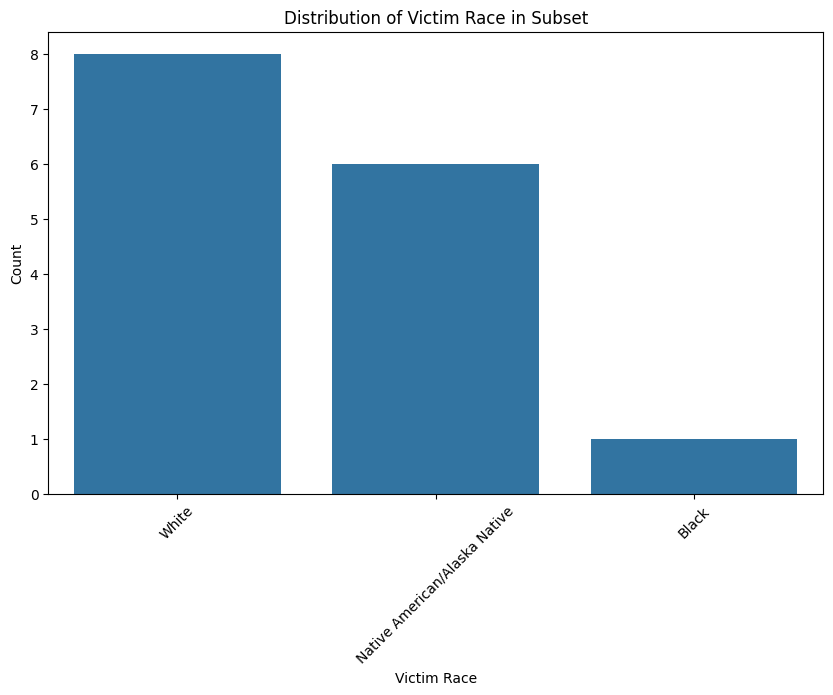

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(data=subset, x='Victim Race', order=subset['Victim Race'].value_counts().index)
plt.title('Distribution of Victim Race in Subset')
plt.xlabel('Victim Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Creating a heatmap of missing values

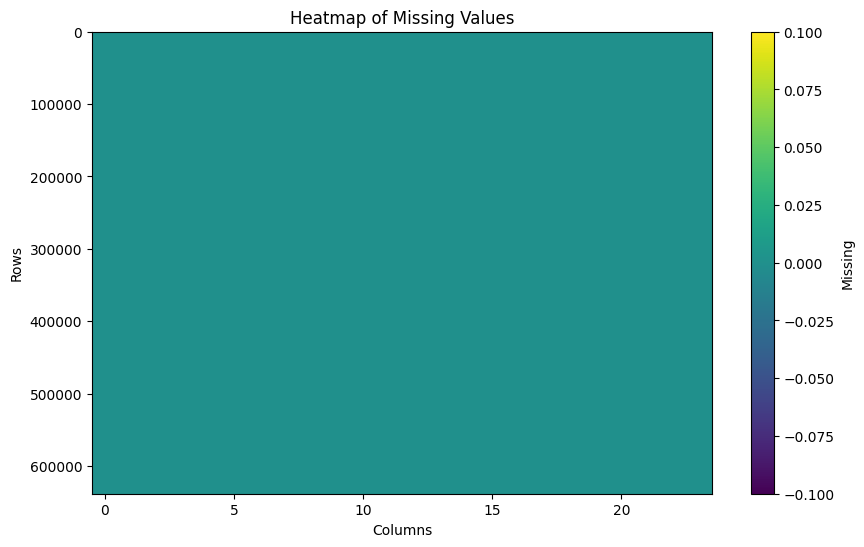

In [14]:
plt.figure(figsize=(10, 6))
missing_values = df.isnull()
plt.imshow(missing_values, cmap='viridis', aspect='auto')
plt.title('Heatmap of Missing Values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.colorbar(label='Missing')
plt.show()

## Summary plot of data types and unique value counts

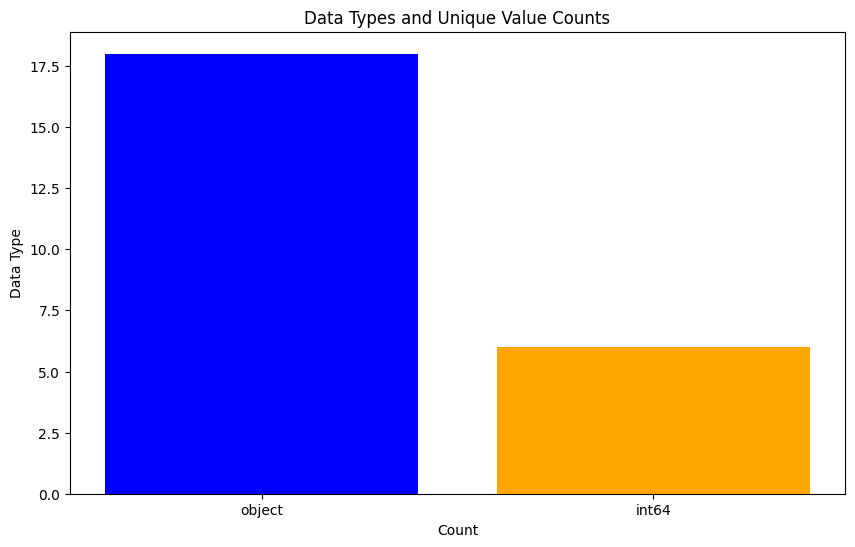

In [15]:
plt.figure(figsize=(10, 6))
dtype_counts = df.dtypes.value_counts()
plt.bar(dtype_counts.index.astype(str), dtype_counts.values, color=['blue', 'orange', 'green'])
plt.title('Data Types and Unique Value Counts')
plt.xlabel('Count')
plt.ylabel('Data Type')
plt.show()

## Creating a bar plot displaying the count of unique and duplicate rows

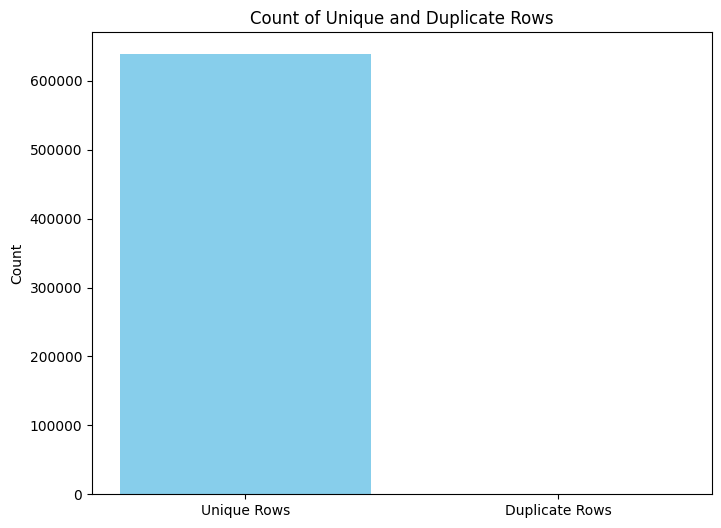

In [16]:
plt.figure(figsize=(8, 6))
plt.bar(['Unique Rows', 'Duplicate Rows'], [len(df) - len(duplicate_rows), len(duplicate_rows)], color=['skyblue', 'salmon'])
plt.title('Count of Unique and Duplicate Rows')
plt.ylabel('Count')
plt.show()